<a href="https://colab.research.google.com/github/pineapple-666/Introduction-to-Statistical-Learning/blob/main/matrix_completion_starter_code.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

pip# Import Needed Packages

In [ ]:
!pip install ISLP

import numpy as np                                  # for numerical operations and array manipulations
import pandas as pd                                 # for data manipulation and analysis

import matplotlib.pyplot as plt                     # for data visualization
import seaborn as sns                               # for advanced data visualization with easier syntax and nicer aesthetics

from sklearn.decomposition import PCA               # Import PCA from scikit-learn for principal component analysis
from sklearn.preprocessing import StandardScaler    # Import StandardScaler to standardize data (zero mean and unit variance)

from ISLP import load_data                          # Import function from ISLP package to load example datasets for statistical learning

np.random.seed(7)


## Load data

In [ ]:
Boston = load_data("Boston")
Boston


,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,lstat,medv
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296,15.3,4.98,24.0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242,17.8,9.14,21.6
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242,17.8,4.03,34.7
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222,18.7,2.94,33.4
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222,18.7,5.33,36.2
...,...,...,...,...,...,...,...,...,...,...,...,...,...
501,0.06263,0.0,11.93,0,0.573,6.593,69.1,2.4786,1,273,21.0,9.67,22.4
502,0.04527,0.0,11.93,0,0.573,6.120,76.7,2.2875,1,273,21.0,9.08,20.6
503,0.06076,0.0,11.93,0,0.573,6.976,91.0,2.1675,1,273,21.0,5.64,23.9
504,0.10959,0.0,11.93,0,0.573,6.794,89.3,2.3889,1,273,21.0,6.48,22.0


![image.png](attachment:image.png)

Understand the data -

In [ ]:
Boston.info()
Boston.describe().T

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 506 entries, 0 to 505
Data columns (total 13 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   crim     506 non-null    float64
 1   zn       506 non-null    float64
 2   indus    506 non-null    float64
 3   chas     506 non-null    int64  
 4   nox      506 non-null    float64
 5   rm       506 non-null    float64
 6   age      506 non-null    float64
 7   dis      506 non-null    float64
 8   rad      506 non-null    int64  
 9   tax      506 non-null    int64  
 10  ptratio  506 non-null    float64
 11  lstat    506 non-null    float64
 12  medv     506 non-null    float64
dtypes: float64(10), int64(3)
memory usage: 51.5 KB


,count,mean,std,min,25%,50%,75%,max
crim,506.0,3.613524,8.601545,0.00632,0.082045,0.25651,3.677083,88.9762
zn,506.0,11.363636,23.322453,0.00000,0.000000,0.00000,12.500000,100.0000
indus,506.0,11.136779,6.860353,0.46000,5.190000,9.69000,18.100000,27.7400
chas,506.0,0.069170,0.253994,0.00000,0.000000,0.00000,0.000000,1.0000
nox,506.0,0.554695,0.115878,0.38500,0.449000,0.53800,0.624000,0.8710
rm,506.0,6.284634,0.702617,3.56100,5.885500,6.20850,6.623500,8.7800
age,506.0,68.574901,28.148861,2.90000,45.025000,77.50000,94.075000,100.0000
dis,506.0,3.795043,2.105710,1.12960,2.100175,3.20745,5.188425,12.1265
rad,506.0,9.549407,8.707259,1.00000,4.000000,5.00000,24.000000,24.0000
tax,506.0,408.237154,168.537116,187.00000,279.000000,330.00000,666.000000,711.0000


### Scale the data

Make sure to check you have been able to scale the data data correctly before applying PCA.  
- Can add some description of what does PCA do.  

In [ ]:
Boston.var()
Boston.mean()

,0
crim,3.613524
zn,11.363636
indus,11.136779
chas,0.069170
nox,0.554695
rm,6.284634
age,68.574901
dis,3.795043
rad,9.549407
tax,408.237154


In [ ]:
scaler = StandardScaler(with_std=True,
                        with_mean=True)
Boston_scaled = scaler.fit_transform(Boston)


# Convert the scaled data back to a DataFrame
Boston_scaled_df = pd.DataFrame(Boston_scaled, columns=Boston.columns)

# Now you can use .describe() to summarize statistics
Boston_scaled_df.describe().T

,count,mean,std,min,25%,50%,75%,max
crim,506.0,-1.123388e-16,1.00099,-0.419782,-0.410970,-0.390667,0.007397,9.933931
zn,506.0,7.898820e-17,1.00099,-0.487722,-0.487722,-0.487722,0.048772,3.804234
indus,506.0,2.106352e-16,1.00099,-1.557842,-0.867691,-0.211099,1.015999,2.422565
chas,506.0,-3.510587e-17,1.00099,-0.272599,-0.272599,-0.272599,-0.272599,3.668398
nox,506.0,-1.965929e-16,1.00099,-1.465882,-0.913029,-0.144217,0.598679,2.732346
rm,506.0,-1.088282e-16,1.00099,-3.880249,-0.568630,-0.108466,0.482768,3.555044
age,506.0,-1.474446e-16,1.00099,-2.335437,-0.837448,0.317382,0.906798,1.117494
dis,506.0,-8.425408e-17,1.00099,-1.267069,-0.805688,-0.279323,0.662371,3.960518
rad,506.0,-1.123388e-16,1.00099,-0.982843,-0.637962,-0.523001,1.661245,1.661245
tax,506.0,0.000000e+00,1.00099,-1.313990,-0.767576,-0.464673,1.530926,1.798194


- Be sure to describe the package and function from where you are using the key commands.  
- Explain your code with comments as much as possible, and also describe with regular text what you are doing.  
- For example, ![image.png](attachment:image.png) vs ![image-2.png](attachment:image-2.png)

In [ ]:
pcaBoston = PCA() # add comments here to explain code.
pcaBoston

PCA()

(By default, the `PCA()`  transform centers the variables to have
mean zero though it does not scale them.) The transform `pcaBoston`
can be used to find the PCA
`scores` returned by `fit()`. Once the `fit` method has been called, the `pcaUS` object also contains a number of useful quantities.

In [ ]:
pcaBoston.fit(Boston_scaled)


PCA()

After fitting, the `mean_` attribute corresponds to the means
of the variables. In this case, since we centered and scaled the data with
`scaler()` the means will all be 0.

In [ ]:
print(len(pcaBoston.mean_)) # explain why is the length 13 ???
pcaBoston.mean_


13


array([-1.12338772e-16,  7.89881994e-17,  2.10635198e-16, -3.51058664e-17,
       -1.96592852e-16, -1.08828186e-16, -1.47444639e-16, -8.42540793e-17,
       -1.12338772e-16,  0.00000000e+00, -4.21270397e-16, -3.08931624e-16,
       -5.19566823e-16])

The scores can be computed using the `transform()` method of `pcaUS` after it has been fit.  
- **BE SURE TO EXPLAIN WHAT ARE PCA scores, and do the dimensions match what you would expect from theory???**

In [ ]:

scores = pcaBoston.transform(Boston_scaled)
print(scores)
print(scores.shape)


[[-2.03968613  0.49026825 -0.4442786  ... -0.11706345 -0.49098881
   0.2515119 ]
 [-1.30409223 -0.18964141 -0.97065911 ...  0.59176544 -0.11611245
  -0.1127964 ]
 [-2.34018838  0.91454417 -0.11316746 ...  0.42119696  0.35270875
   0.0481254 ]
 ...
 [-0.27497263  0.79730625 -0.77890591 ... -0.33403172 -0.14878384
   0.00301684]
 [-0.17624425  0.51298571 -0.89292984 ... -0.31922572 -0.14147734
  -0.00894043]
 [ 0.30223062 -0.5964351  -1.42087397 ... -0.45077426 -0.50748973
  -0.13209221]]
(506, 13)


- **BE SURE TO EXPLAIN WHAT are the `components` method extracting (PC loadings?), and do the dimensions you get in the (loading) matrix are consistent with theory???**


In [ ]:
print(pcaBoston.components_.shape)
pcaBoston.components_


(13, 13)


array([[ 2.42755751e-01, -2.54412844e-01,  3.39194411e-01,
        -3.39886090e-03,  3.31332714e-01, -2.10573420e-01,
         3.05261232e-01, -3.05937761e-01,  3.05497402e-01,
         3.27461336e-01,  2.13780264e-01,  3.17265523e-01,
        -2.71026715e-01],
       [-6.01622995e-02, -1.39722489e-01,  1.24192151e-01,
         4.08542478e-01,  2.52417143e-01,  4.41320795e-01,
         2.55347559e-01, -3.54929105e-01,  3.64441425e-02,
         1.27180556e-02, -3.17354728e-01, -2.04637155e-01,
         4.48097824e-01],
       [ 4.34651707e-01,  3.85973151e-01, -4.16482114e-02,
        -1.43139302e-01, -4.59927561e-02,  3.44610806e-01,
        -1.94635533e-01,  1.47623828e-01,  4.82174396e-01,
         4.03994650e-01,  8.44032239e-02, -1.69248823e-01,
         1.66908853e-01],
       [ 1.26013987e-01,  3.21682204e-01,  2.31814360e-03,
         8.16180315e-01, -4.14303788e-04, -2.73248765e-01,
        -1.21665125e-01,  2.11278880e-01,  4.90273484e-02,
         5.19315778e-02, -1.46179035e

### Visualisation

Do not get distracted from the key goal of the exercise.  However, I do want to plot the features and see which ones are similar.

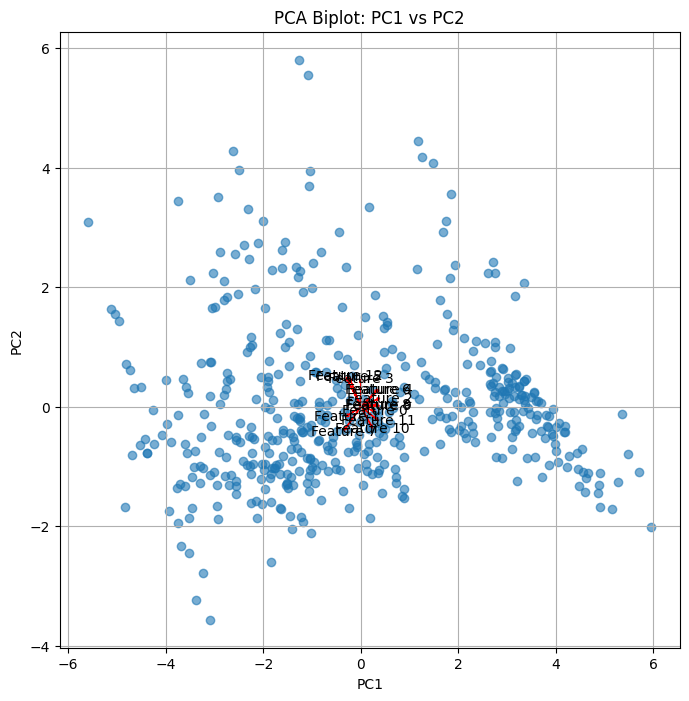

In [ ]:
# Indices for components to visualize
i, j = 0, 1  # PC1 and PC2

# Create a plot
fig, ax = plt.subplots(1, 1, figsize=(8, 8))

# Plot the scores (projections onto PC1 and PC2)
ax.scatter(scores[:, i], scores[:, j], alpha=0.6)
ax.set_xlabel('PC%d' % (i+1))  # Label PC1
ax.set_ylabel('PC%d' % (j+1))  # Label PC2


# Plotting the component vectors (loadings)
for k in range(pcaBoston.components_.shape[1]):
    ax.arrow(0, 0, pcaBoston.components_[i, k], pcaBoston.components_[j, k],
             head_width=0.05, head_length=0.05, fc='red', ec='red')  # Add arrows for component loadings
    ax.text(pcaBoston.components_[i, k] * 1.15, pcaBoston.components_[j, k] * 1.15,
            'Feature %d' % k, color='black', ha='center', va='center')  # Add feature names or indices

plt.title("PCA Biplot: PC1 vs PC2")
plt.grid(True)
plt.show()




- PC1 has the maximum variance: The x-axis (PC1) is set with a range of -6 to 6 because PC1 captures the most variance in the data. This indicates that the spread of the data along this axis is broader, showing that the first principal component explains the largest portion of the variability in the dataset.
- PC2 has slightly less variance: The y-axis (PC2) is set with a range of -4 to 6, reflecting that the variance captured by PC2 is smaller compared to PC1. The spread along this axis is narrower, which means the second principal component explains a smaller, but still significant, portion of the variance.

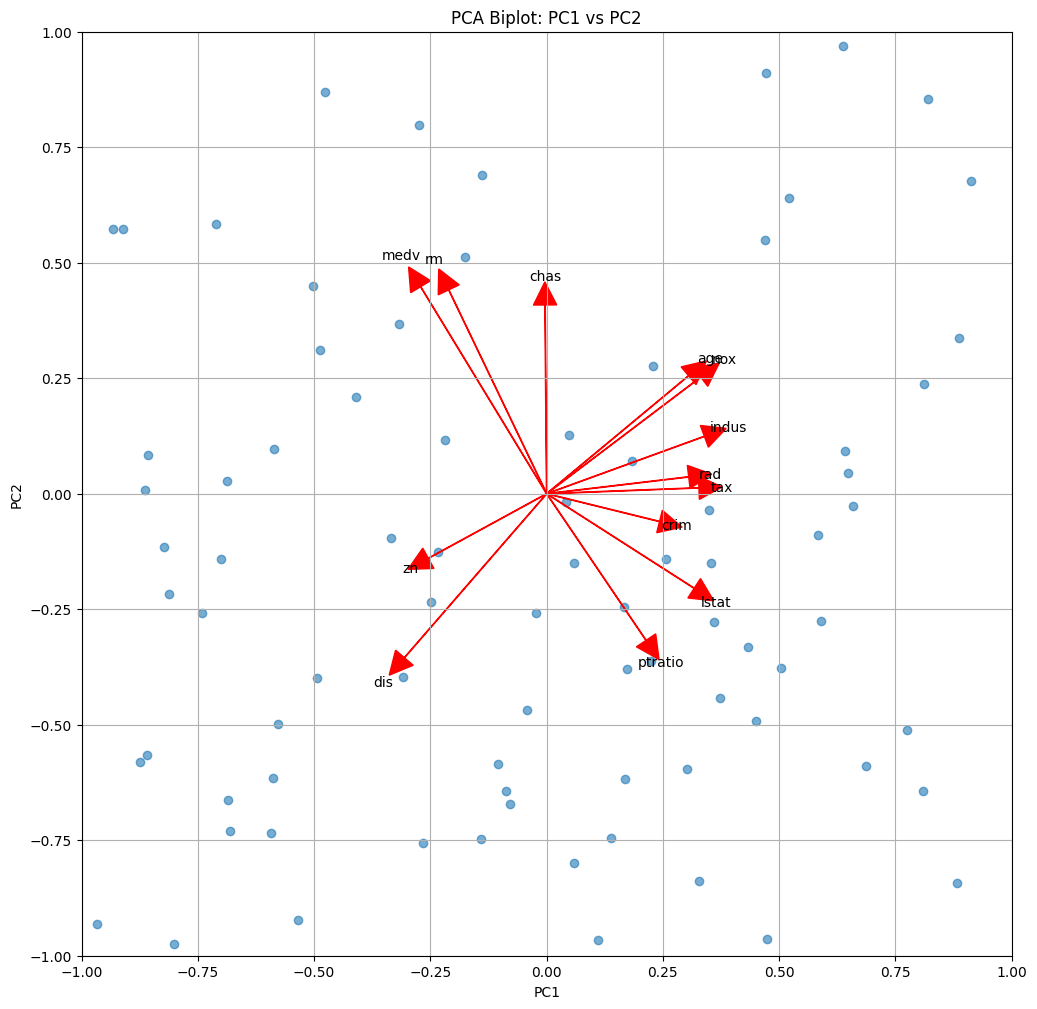

In [ ]:
# Indices for components to visualize
i, j = 0, 1  # PC1 and PC2

# Create a plot
fig, ax = plt.subplots(1, 1, figsize=(12, 12))

# Plot the scores (projections onto PC1 and PC2)
ax.scatter(scores[:, i], scores[:, j], alpha=0.6)
ax.set_xlabel('PC%d' % (i+1))  # Label PC1
ax.set_ylabel('PC%d' % (j+1))  # Label PC2

# Set axis limits (optional)
ax.set_xlim([-1, 1])  # Set limits for the x-axis (PC1)
ax.set_ylim([-1, 1])  # Set limits for the y-axis (PC2)

# Assuming `USArrests.columns` has the feature names
feature_names = Boston.columns.tolist()  # Assuming X is your original DataFrame

# Plotting the component vectors (loadings) and labeling by feature names
for k in range(pcaBoston.components_.shape[1]):
    ax.arrow(0, 0, pcaBoston.components_[i, k], pcaBoston.components_[j, k],
             head_width=0.05, head_length=0.05, fc='red', ec='red')  # Add arrows for component loadings
    ax.text(pcaBoston.components_[i, k] * 1.15, pcaBoston.components_[j, k] * 1.15,
            feature_names[k], color='black', ha='center', va='center')  # Use feature names instead of 'Feature %d'

plt.title("PCA Biplot: PC1 vs PC2")
plt.grid(True)
plt.show()


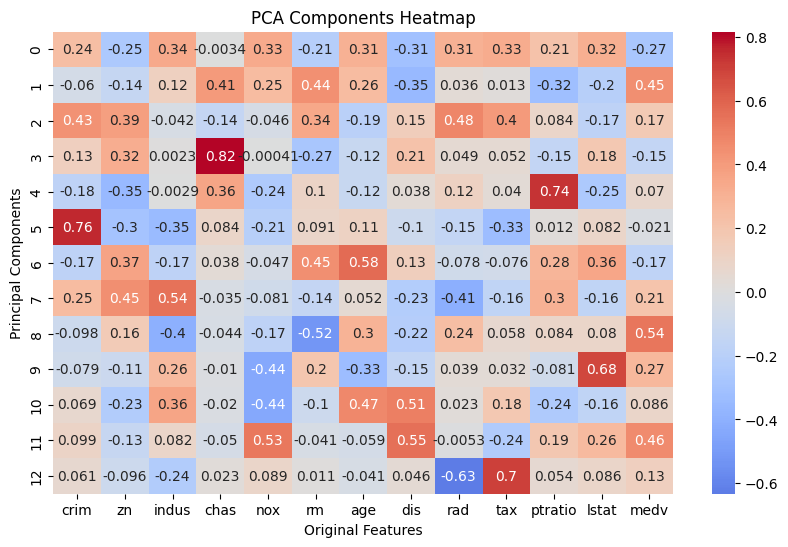

In [ ]:
# Pull feature names directly from the DataFrame
feature_names = Boston.columns.tolist()  # Assuming X is your original DataFrame

# Convert PCA components into a DataFrame with feature names as column headers
components_df = pd.DataFrame(pcaBoston.components_, columns=feature_names)

# Set up the heatmap
plt.figure(figsize=(10, 6))
sns.heatmap(components_df, annot=True, cmap="coolwarm", center=0)
plt.title("PCA Components Heatmap")
plt.xlabel("Original Features")
plt.ylabel("Principal Components")
plt.show()

## Singular Value Decomposition

- Check if the same matrix X is obtained using Singular Value Decomposition (SVD) as you do from PCA, and whether V from SVD corresponds to the factor loadings, and the matrix product of U and D (from SVD) corresponds to the scores matrix from PCA.

In [ ]:
X = Boston_scaled
U, D, V = np.linalg.svd(X, full_matrices=False)
U.shape, D.shape, V.shape


((506, 13), (13,), (13, 13))

The `np.linalg.svd()` function returns three components, `U`, `D` and `V`. The matrix `V` is equivalent to the
loading matrix from principal components (up to an unimportant sign flip). Using the `full_matrices=False` option ensures that
for a tall matrix the shape of `U` is the same as the shape of `X`.

In [ ]:
V


array([[ 2.42755751e-01, -2.54412844e-01,  3.39194411e-01,
        -3.39886090e-03,  3.31332714e-01, -2.10573420e-01,
         3.05261232e-01, -3.05937761e-01,  3.05497402e-01,
         3.27461336e-01,  2.13780264e-01,  3.17265523e-01,
        -2.71026715e-01],
       [-6.01622995e-02, -1.39722489e-01,  1.24192151e-01,
         4.08542478e-01,  2.52417143e-01,  4.41320795e-01,
         2.55347559e-01, -3.54929105e-01,  3.64441425e-02,
         1.27180556e-02, -3.17354728e-01, -2.04637155e-01,
         4.48097824e-01],
       [ 4.34651707e-01,  3.85973151e-01, -4.16482114e-02,
        -1.43139302e-01, -4.59927561e-02,  3.44610806e-01,
        -1.94635533e-01,  1.47623828e-01,  4.82174396e-01,
         4.03994650e-01,  8.44032239e-02, -1.69248823e-01,
         1.66908853e-01],
       [ 1.26013987e-01,  3.21682204e-01,  2.31814360e-03,
         8.16180315e-01, -4.14303788e-04, -2.73248765e-01,
        -1.21665125e-01,  2.11278880e-01,  4.90273484e-02,
         5.19315778e-02, -1.46179035e

In [ ]:
pcaBoston.components_


array([[ 2.42755751e-01, -2.54412844e-01,  3.39194411e-01,
        -3.39886090e-03,  3.31332714e-01, -2.10573420e-01,
         3.05261232e-01, -3.05937761e-01,  3.05497402e-01,
         3.27461336e-01,  2.13780264e-01,  3.17265523e-01,
        -2.71026715e-01],
       [-6.01622995e-02, -1.39722489e-01,  1.24192151e-01,
         4.08542478e-01,  2.52417143e-01,  4.41320795e-01,
         2.55347559e-01, -3.54929105e-01,  3.64441425e-02,
         1.27180556e-02, -3.17354728e-01, -2.04637155e-01,
         4.48097824e-01],
       [ 4.34651707e-01,  3.85973151e-01, -4.16482114e-02,
        -1.43139302e-01, -4.59927561e-02,  3.44610806e-01,
        -1.94635533e-01,  1.47623828e-01,  4.82174396e-01,
         4.03994650e-01,  8.44032239e-02, -1.69248823e-01,
         1.66908853e-01],
       [ 1.26013987e-01,  3.21682204e-01,  2.31814360e-03,
         8.16180315e-01, -4.14303788e-04, -2.73248765e-01,
        -1.21665125e-01,  2.11278880e-01,  4.90273484e-02,
         5.19315778e-02, -1.46179035e

The matrix `U` corresponds to a  *standardized* version of the PCA score matrix (each column standardized to have sum-of-squares one). If we multiply each column of `U` by the corresponding element  of `D`, we recover the PCA scores exactly (up to a meaningless sign flip).

In [ ]:
from sklearn.decomposition import PCA
import numpy as np

# Perform SVD on the scaled matrix X
U, D, Vt = np.linalg.svd(Boston_scaled, full_matrices=False)  # Vt is the transpose of V

# Perform PCA with all components (no dimensionality reduction)
pca_full = PCA(n_components=Boston_scaled.shape[1])  # Retain all components
pca_full.fit(Boston_scaled)

# PCA scores matrix (projected data onto principal components)
pca_scores = pca_full.transform(Boston_scaled)
print("\n PCA Scores Matrix \n",pca_scores, "\n PCA Scores size \n", pca_scores.shape)

# SVD scores matrix (U * D)
svd_scores = U * D  # Multiply U by D element-wise
print("\n SVD Scores Matrix \n",svd_scores, "\n SVD Scores size \n", svd_scores.shape)



 PCA Scores Matrix 
 [[-2.03968613  0.49026825 -0.4442786  ... -0.11706345 -0.49098881
   0.2515119 ]
 [-1.30409223 -0.18964141 -0.97065911 ...  0.59176544 -0.11611245
  -0.1127964 ]
 [-2.34018838  0.91454417 -0.11316746 ...  0.42119696  0.35270875
   0.0481254 ]
 ...
 [-0.27497263  0.79730625 -0.77890591 ... -0.33403172 -0.14878384
   0.00301684]
 [-0.17624425  0.51298571 -0.89292984 ... -0.31922572 -0.14147734
  -0.00894043]
 [ 0.30223062 -0.5964351  -1.42087397 ... -0.45077426 -0.50748973
  -0.13209221]] 
 PCA Scores size 
 (506, 13)

 SVD Scores Matrix 
 [[-2.03968613  0.49026825 -0.4442786  ... -0.11706345  0.49098881
   0.2515119 ]
 [-1.30409223 -0.18964141 -0.97065911 ...  0.59176544  0.11611245
  -0.1127964 ]
 [-2.34018838  0.91454417 -0.11316746 ...  0.42119696 -0.35270875
   0.0481254 ]
 ...
 [-0.27497263  0.79730625 -0.77890591 ... -0.33403172  0.14878384
   0.00301684]
 [-0.17624425  0.51298571 -0.89292984 ... -0.31922572  0.14147734
  -0.00894043]
 [ 0.30223062 -0.5964351

# ACTUAL QUESTION:  IMPLEMENTING Iterative Matrix Completion Algorithm

Matrix completion is a powerful technique for estimating or predicting missing entries in a matrix based on the available data. It’s used in a wide range of fields, including recommendation systems, data imputation, and signal processing. The core idea is that even with missing data, we can recover the full matrix if the underlying structure is simple, such as being low-rank.

- Low-Rank Structure: Many real-world datasets, like user-item ratings in recommendation systems, exhibit low-rank structure. This means that the data can be described by a few underlying patterns or components (i.e., most of the data’s variability can be captured by a small number of latent factors). For example, in a movie recommendation system, user preferences and movie characteristics may be driven by a small set of features, making the matrix of user ratings low-rank.

- Goal of Matrix Completion: The goal is to recover missing entries in a matrix by leveraging this low-rank structure. The assumption is that the observed part of the matrix provides enough information to infer the missing parts accurately. For example, given a partially filled user-movie ratings matrix, we want to predict the missing ratings based on known ratings.




Please read the relevant sections of the textbook for more information. In particular, Section *12.3 Missing Values and Matrix Completion* and Section *12.5.2 Matrix Completion*.

![image.png](attachment:image.png)



**How It Works**:

*1. Initial Guess (Mean Imputation or Random Filling):*

When starting matrix completion, the first step is to fill in the missing values with a simple estimate, such as the mean of the available entries in the corresponding row or column. This provides an initial approximation of the missing data and allows us to start the iterative improvement process.
**This is mean imputation in step 1 in the picture above.**

*2. Low-Rank Approximation:*

The key to matrix completion is assuming the matrix is low-rank. We perform a decomposition like Singular Value Decomposition (SVD) or use Principal Component Analysis (PCA) to find the underlying factors or components that best describe the observed data. These components reveal hidden patterns that allow us to estimate the missing values.

In SVD:
X ≈ U⋅D⋅V^{T}
where:
X is the original matrix, U and V contain the left and right singular vectors (describing row and column relationships), D contains singular values that describe how much variance each component explains.
A low-rank approximation uses only the first few components (those with the highest singular values) to reconstruct an approximation of the matrix, capturing the main structure of the data while ignoring noise.
**This is step 2a in picture above.**

*3. Iterative Refinement:*

After the initial guess, an iterative process begins where:

- A low-rank approximation of the matrix is computed.
- Missing values are replaced by the estimated values from this approximation.  **This is step 2b in picture above.**
- The approximation is continuously improved with each iteration.  

At each step, the mean sum of squares (MSS) between the observed entries and the approximated entries is calculated.  **This is step 2c in picture above.**

The algorithm continues to update the missing values until the relative improvement in error falls below a certain threshold or a maximum number of iterations is reached.

*4. Convergence:*

The matrix completion process converges when the relative error (the change in MSS between iterations) becomes small enough. This indicates that the low-rank approximation has stabilized and no further significant improvements can be made. At this point, the matrix is considered complete, with the missing entries filled in by the inferred values.

## Setup: Introduce missing values into the dataset X

Randomly select a proportion of entries to replace with NaN value. Replace the missing values with mean values of the column.

## Setup: Find Matrix approximation of X (which has missing values)

The low_rank function performs low-rank approximation of a matrix using SVD. It essentially reduces the dimensionality of the data while preserving the key components that capture the most variance.

- In the `low_rank` function, the default value of `M` is set to `1`. The function will use only the first principal component to approximate the matrix `X` by default. Using just the first component provides a rank-1 approximation of the matrix, which captures the direction of the maximum variance in the data.

In [ ]:
# Function to perform low-rank approximation using SVD

def low_rank(X, M=1):
    """
    Perform low-rank approximation of matrix X using SVD with M components.

    Parameters:
    - X: Input matrix.
    - M: Number of components to retain.

    Returns:
    - Low-rank approximation of X using M components.
    """

    U, D, V = np.linalg.svd(X, full_matrices=False)  # Perform SVD
    L = U[:, :M] * D[:M]    # Multiply U by the first M singular values. PCA scores for the first M components. We take the first M columns of U (left singular vectors) and scale them by the first M singular values in D.
    return L.dot(V[:M, :])  # Reconstruct the data matrix X (approximation) by using M components.

help(np.dot)

Help on _ArrayFunctionDispatcher in module numpy:

dot(...)
    dot(a, b, out=None)

    Dot product of two arrays. Specifically,

    - If both `a` and `b` are 1-D arrays, it is inner product of vectors
      (without complex conjugation).

    - If both `a` and `b` are 2-D arrays, it is matrix multiplication,
      but using :func:`matmul` or ``a @ b`` is preferred.

    - If either `a` or `b` is 0-D (scalar), it is equivalent to
      :func:`multiply` and using ``numpy.multiply(a, b)`` or ``a * b`` is
      preferred.

    - If `a` is an N-D array and `b` is a 1-D array, it is a sum product over
      the last axis of `a` and `b`.

    - If `a` is an N-D array and `b` is an M-D array (where ``M>=2``), it is a
      sum product over the last axis of `a` and the second-to-last axis of
      `b`::

        dot(a, b)[i,j,k,m] = sum(a[i,j,:] * b[k,:,m])

    It uses an optimized BLAS library when possible (see `numpy.linalg`).

    Parameters
    ----------
    a : array_like
        Fir

## 3.  Actual Code for implementing the algorithm

Understand the loop below and try improving it, or the associated output (final results, or the entire pipeline say by breaking the code into easier to understand code chunks).

- **Be sure to explain it in much more depth to the reader for full credit, either with code comments and/or painting the big picture.**  It should be an easy to read report.

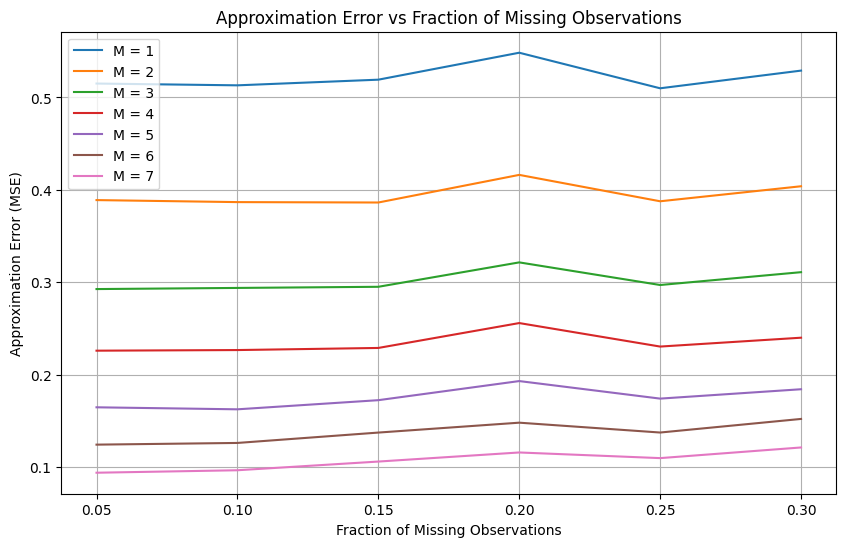

(7, 6)


array([[0.51510747, 0.51316913, 0.51929081, 0.54848506, 0.5099629 ,
        0.52911541],
       [0.38888451, 0.38670314, 0.38627133, 0.41618898, 0.38760253,
        0.40386362],
       [0.2925224 , 0.29375764, 0.29498848, 0.32142232, 0.29692561,
        0.31081889],
       [0.22580085, 0.22647535, 0.22875403, 0.25571006, 0.23025611,
        0.23985276],
       [0.16447851, 0.1622942 , 0.17219507, 0.19288748, 0.17388626,
        0.1840344 ],
       [0.12404317, 0.12587674, 0.13711284, 0.14782509, 0.13715694,
        0.15188122],
       [0.09362781, 0.0963038 , 0.10571541, 0.11555995, 0.10944502,
        0.12098164]])

In [ ]:
X = load_data("Boston")

# 1. Standardize the data
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Function to apply Algorithm 12.1 (SVD-based low-rank approximation) - default PC value is 1
def low_rank(X, M=1):
    U, D, V = np.linalg.svd(X, full_matrices=False)     # SVD on X
    L = U[:, :M] * D[:M]        # Scores for the first M components
    return L.dot(V[:M, :])      # Low-rank approximation of X using M components

# Function to run matrix completion experiment
def matrix_completion_experiment(X, M_values, omit_fractions):

    errors = np.zeros((len(M_values), len(omit_fractions)))

    for j, frac in enumerate(omit_fractions):
        # Create a copy of the original data
        Xna = X.copy()

        # Randomly remove the specified fraction of data
        n_omit = round(frac * X.shape[0] * X.shape[1])  # Total number of values to omit
        r_idx = np.random.choice(np.arange(X.shape[0]), n_omit, replace=True)
        c_idx = np.random.choice(np.arange(X.shape[1]), n_omit, replace=True)
        Xna[r_idx, c_idx] = np.nan

        # Initial guess: fill missing values with column means
        Xhat = Xna.copy()
        Xbar = np.nanmean(Xhat, axis=0)
        Xhat[np.isnan(Xhat)] = np.take(Xbar, np.where(np.isnan(Xhat))[1])

        # Mask for missing entries
        ismiss = np.isnan(Xna)

        for i, M in enumerate(M_values):
            # Apply low-rank approximation for M components
            Xapp = low_rank(Xhat, M)

            # Calculate the approximation error (only for non-missing values)
            mse = np.mean(((X[~ismiss] - Xapp[~ismiss]) ** 2))
            errors[i, j] = mse

    return errors

# 2. Define parameters for the experiment
M_values = np.arange(1, 8)  # M from 1 to 8
omit_fractions = np.arange(0.05, 0.35, 0.05)  # 5% to 30% in steps of 5%

# 3. Run the experiment and collect errors
errors = matrix_completion_experiment(X_scaled, M_values, omit_fractions)

# 4. Plot the results
plt.figure(figsize=(10, 6))
for i, M in enumerate(M_values):
    plt.plot(omit_fractions, errors[i], label=f'M = {M}')

plt.title('Approximation Error vs Fraction of Missing Observations')
plt.xlabel('Fraction of Missing Observations')
plt.ylabel('Approximation Error (MSE)')
plt.legend()
plt.grid(True)
plt.show()

print(errors.shape)
errors


- Try deleting some code chunks below that are irrelevant for the chart, or develop it fully into two parts - one chart that shows for constant fraction of missing data, how does adding more principal componenet (M) decreases error, and another chart that shows for a constnat principal component, how does increasing the fraction of missing data impact error.

[0.05 0.1  0.15 0.2  0.25 0.3 ]


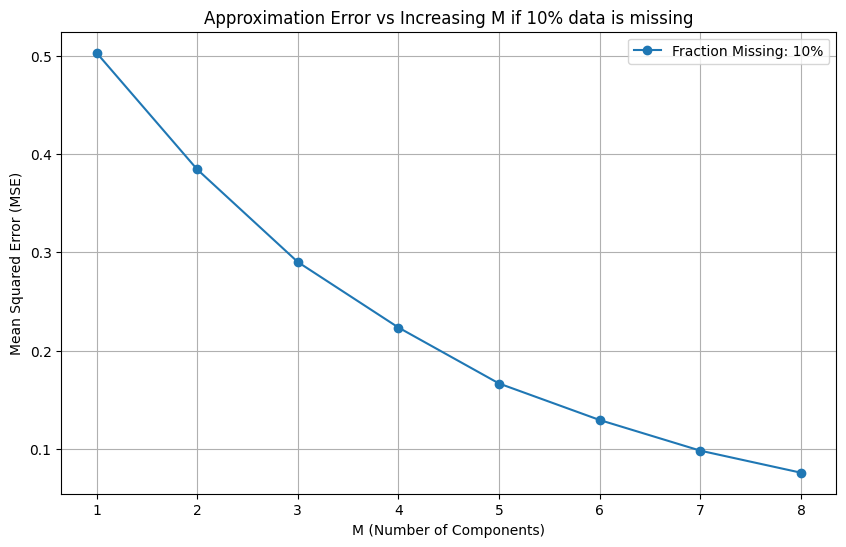

In [ ]:
from ISLP import load_data
Boston = load_data("Boston")


# 1. Standardize the data
# Standardizing means scaling the features so that they have mean = 0 and standard deviation = 1.
scaler = StandardScaler()
X_scaled = scaler.fit_transform(Boston)

# 2. Define omission fractions (fractions of the data to be omitted)
# We will randomly omit between 5% and 30% of the data, in steps of 5%.
omit_fractions = np.arange(0.05, 0.35, 0.05)  # 5%, 10%, 15%, 20%, 25%, 30%
print(omit_fractions)

# 3. Function to randomly omit values and create a matrix with missing data
def create_missing_data(X, frac):
    """
    Function to randomly set a fraction of values in the matrix X to NaN.

    Parameters:
    - X: the input data matrix (numpy array)
    - frac: the fraction of values to omit

    Returns:
    - Xna: a copy of X with some values randomly set to NaN
    """
    Xna = X.copy()                                      # Make a copy to avoid modifying the original data
    n_omit = round(frac * X.shape[0] * X.shape[1])      # Total number of values to omit

    # Randomly select row and column indices for the values to omit
    r_idx = np.random.choice(np.arange(X.shape[0]), n_omit, replace=True) # rows
    c_idx = np.random.choice(np.arange(X.shape[1]), n_omit, replace=True) # columns

    # Set the randomly selected values to NaN
    Xna[r_idx, c_idx] = np.nan
    return Xna

# 4. Low-rank approximation function using SVD
def low_rank(X, M=1):
    """
    Perform low-rank approximation using SVD.

    Parameters:
    - X: the input data matrix (numpy array)
    - M: number of components to use in the approximation

    Returns:
    - A low-rank approximation of X using M components.
    """
    U, D, V = np.linalg.svd(X, full_matrices=False)  # Perform Singular Value Decomposition
    L = U[:, :M] * D[:M]                                # Multiply U by the singular values (for the first M components)
    return L.dot(V[:M, :])                              # Reconstruct the data matrix X using the first M components

# 5. Experiment for different M values (with fixed fraction of missing data)
def experiment_by_M(Xna, M_values, frac=0.1):
    """
    Run matrix completion experiment with fixed fraction of missing data and varying M.

    Parameters:
    - Xna: the input data matrix with missing values
    - M_values: array of M values (number of components) to test
    - frac: fraction of missing data

    Returns:
    - errors: list of tuples (M, MSE), where MSE is the mean squared error for each M.
    """
    errors = []                                                         # To store the results
    ismiss = np.isnan(Xna)                                              # Boolean mask for missing values
    Xhat = Xna.copy()                                                   # Make a copy of the matrix with missing values
    Xbar = np.nanmean(Xhat, axis=0)                                     # Compute column means (ignoring NaNs)
    Xhat[np.isnan(Xhat)] = np.take(Xbar, np.where(np.isnan(Xhat))[1])   # Fill missing values of Xhat with column means

    # Loop over each M (number of components) and compute the error
    for M in M_values:
        Xapp = low_rank(Xhat, M)                            # Perform low-rank approximation
        mse = np.mean(((X_scaled - Xapp)[~ismiss]) ** 2)    # Mean Squared Error on non-missing values
        errors.append((M, mse))                             # Store the result
    return np.array(errors)

# 6. Experiment for different fractions of missing data (with fixed M)
def experiment_by_fraction(M, omit_fractions):
    """
    Run matrix completion experiment with fixed M and varying fractions of missing data.

    Parameters:
    - M: the number of components to use for low-rank approximation
    - omit_fractions: array of fractions of data to omit

    Returns:
    - errors: list of tuples (fraction, MSE), where MSE is the mean squared error for each fraction.
    """
    errors = []  # To store the results

    # Loop over each fraction of missing data and compute the error
    for frac in omit_fractions:
        Xna = create_missing_data(X_scaled, frac)  # Create the matrix with missing values
        ismiss = np.isnan(Xna)  # Boolean mask for missing values
        Xhat = Xna.copy()  # Make a copy of the matrix with missing values
        Xbar = np.nanmean(Xhat, axis=0)  # Compute column means (ignoring NaNs)
        Xhat[np.isnan(Xhat)] = np.take(Xbar, np.where(np.isnan(Xhat))[1])  # Fill missing values with column means

        Xapp = low_rank(Xhat, M)  # Perform low-rank approximation
        mse = np.mean(((X_scaled - Xapp)[~ismiss]) ** 2)  # Mean Squared Error on non-missing values
        errors.append((frac, mse))  # Store the result
    return np.array(errors)

# 7. Define parameters
M_values = np.arange(1, 9)  # M from 1 to 8 (number of components to test)
omit_fractions = np.arange(0.05, 0.35, 0.05)  # Fractions of data to omit: 5%, 10%, ..., 30%

# 8. Run experiment with fixed fraction of missing data and varying M
fixed_frac = 0.1  # Fixed fraction of 10% missing data
errors_by_M = experiment_by_M(create_missing_data(X_scaled, fixed_frac), M_values)

# 9. Run experiment with fixed M and varying fraction of missing data
fixed_M = 4  # Fixed M = 4 components
errors_by_frac = experiment_by_fraction(fixed_M, omit_fractions)

# 10. Plot the results for increasing M
plt.figure(figsize=(10, 6))
plt.plot(errors_by_M[:, 0], errors_by_M[:, 1], marker='o', label=f'Fraction Missing: {fixed_frac * 100:.0f}%')
plt.title('Approximation Error vs Increasing M if 10% data is missing')
plt.xlabel('M (Number of Components)')
plt.ylabel('Mean Squared Error (MSE)')
plt.grid(True)
plt.legend()
plt.show()




# Appendix

You can always find more efficient (compact, more readable) ways to get the same tasks done.  Try to see if you can find more efficient code.

# Section 12.5.2 Matrix Completion Example

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from statsmodels.datasets import get_rdataset
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
from ISLP import load_data

In [ ]:
USArrests = get_rdataset('USArrests').data
USArrests.info()

scaler = StandardScaler(with_std=True, with_mean=True)
USArrests_scaled = scaler.fit_transform(USArrests)
pcaUS = PCA()
pcaUS.fit(USArrests_scaled)

pcaUS.mean_
scores = pcaUS.transform(USArrests_scaled) # score  matrix
pcaUS.components_                          # loading matrix


<class 'pandas.core.frame.DataFrame'>
Index: 50 entries, Alabama to Wyoming
Data columns (total 4 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Murder    50 non-null     float64
 1   Assault   50 non-null     int64  
 2   UrbanPop  50 non-null     int64  
 3   Rape      50 non-null     float64
dtypes: float64(2), int64(2)
memory usage: 2.0+ KB


array([[ 0.53589947,  0.58318363,  0.27819087,  0.54343209],
       [-0.41818087, -0.1879856 ,  0.87280619,  0.16731864],
       [-0.34123273, -0.26814843, -0.37801579,  0.81777791],
       [-0.6492278 ,  0.74340748, -0.13387773, -0.08902432]])

In [ ]:
X = USArrests_scaled
U, D, V = np.linalg.svd(X, full_matrices=False)
U.shape, D.shape, V.shape

((50, 4), (4,), (4, 4))

In [ ]:
V                               # PCA Loadings matrix, with an unimportant sign flip

array([[-0.53589947, -0.58318363, -0.27819087, -0.54343209],
       [-0.41818087, -0.1879856 ,  0.87280619,  0.16731864],
       [ 0.34123273,  0.26814843,  0.37801579, -0.81777791],
       [ 0.6492278 , -0.74340748,  0.13387773,  0.08902432]])

In [ ]:
pcaUS.components_

array([[ 0.53589947,  0.58318363,  0.27819087,  0.54343209],
       [-0.41818087, -0.1879856 ,  0.87280619,  0.16731864],
       [-0.34123273, -0.26814843, -0.37801579,  0.81777791],
       [-0.6492278 ,  0.74340748, -0.13387773, -0.08902432]])

U is the standardized version of the PCA score matrix (each column standardized to have sum-of-squares one).
If we multiply each column of U by the corresponding element of D, we recover the PCA scores exactly (up to a meaningless sign flip).

In [ ]:
(U * D[None,:])[:3]             # PCA Scores matrix, with an unimportant sign flip

array([[-0.98556588, -1.13339238,  0.44426879,  0.15626714],
       [-1.95013775, -1.07321326, -2.04000333, -0.43858344],
       [-1.76316354,  0.74595678, -0.05478082, -0.83465292]])

In [ ]:
scores[:3]

array([[ 0.98556588, -1.13339238, -0.44426879, -0.15626714],
       [ 1.95013775, -1.07321326,  2.04000333,  0.43858344],
       [ 1.76316354,  0.74595678,  0.05478082,  0.83465292]])

### Omit Observations

In [ ]:
n_omit = 20
np.random.seed(15)

r_idx = np.random.choice(np.arange(X.shape[0]), n_omit , replace=False)
c_idx = np.random.choice(np.arange(X.shape[1]), n_omit , replace=True)

Xna = X.copy()
Xna[r_idx, c_idx] = np.nan  # update Xna with missing values
Xna

array([[ 1.25517927,  0.79078716, -0.52619514, -0.00345116],
       [ 0.51301858,  1.11805959, -1.22406668,  2.50942392],
       [ 0.07236067,  1.49381682,  1.00912225,  1.05346626],
       [ 0.23470832,  0.23321191, -1.08449238,         nan],
       [ 0.28109336,  1.2756352 ,  1.77678094,  2.08881393],
       [ 0.02597562,  0.40290872,  0.86954794,  1.88390137],
       [-1.04088037, -0.73648418,  0.79976079, -1.09272319],
       [-0.43787481,  0.81502956,  0.45082502, -0.58583422],
       [ 1.76541475,  1.99078607,  1.00912225,  1.1505301 ],
       [        nan,  0.48775713, -0.38662083,  0.49265293],
       [-0.57702994, -1.51224105,  1.21848371, -0.11129987],
       [-1.20322802, -0.61527217, -0.80534376, -0.75839217],
       [ 0.60578867,  0.94836277,  1.21848371,  0.29852525],
       [-0.13637203, -0.70012057, -0.03768506, -0.0250209 ],
       [-1.29599811, -1.39102904, -0.5959823 ,         nan],
       [-0.41468229, -0.67587817,  0.03210209, -0.34856705],
       [ 0.44344101,    

Some code to implement Algorithm 12.1.
We first write a function that takes in a matrix, and returns an approximation to the matrix using the `svd()` function.
This will be needed in Step 2 of Algorithm 12.1.

In [ ]:
def low_rank(X, M=1):
    U, D, V = np.linalg.svd(X)
    L = U[:,:M] * D[None,:M]     #  upto the M column or PC, default is 1 PC (max var).
    return L.dot(V[:M])

To conduct Step 1 of the algorithm, we initialize Xhat — this is $\tilde{X}$ in Algorithm 12.1 — by replacing the missing values with the column means of the non-missing entries.
These are stored in `Xbar` below after running `np.nanmean()` over the row axis. We make a copy so that when we assign values to `Xhat` below we do not also overwrite the values in `Xna`.

In [ ]:
Xhat = Xna.copy()
Xbar = np.nanmean(Xhat, axis=0)         # Compute the arithmetic mean along the specified axis, ignoring NaNs.
# ?np.nanmean
print(Xbar)
Xhat[r_idx, c_idx] = Xbar[c_idx]        # Fill missing values in Xhat by replacing NaNs with the mean of the corresponding column (r_idx/c_idx represents the row/columns indices where missing values are located, and Xbar[c_idx] gets the mean of the corresponding column to fill in the missing value
Xhat     # NO MISSING VALUES


[-0.00368923  0.10759219  0.02616276  0.04508076]


array([[ 1.25517927,  0.79078716, -0.52619514, -0.00345116],
       [ 0.51301858,  1.11805959, -1.22406668,  2.50942392],
       [ 0.07236067,  1.49381682,  1.00912225,  1.05346626],
       [ 0.23470832,  0.23321191, -1.08449238,  0.04508076],
       [ 0.28109336,  1.2756352 ,  1.77678094,  2.08881393],
       [ 0.02597562,  0.40290872,  0.86954794,  1.88390137],
       [-1.04088037, -0.73648418,  0.79976079, -1.09272319],
       [-0.43787481,  0.81502956,  0.45082502, -0.58583422],
       [ 1.76541475,  1.99078607,  1.00912225,  1.1505301 ],
       [-0.00368923,  0.48775713, -0.38662083,  0.49265293],
       [-0.57702994, -1.51224105,  1.21848371, -0.11129987],
       [-1.20322802, -0.61527217, -0.80534376, -0.75839217],
       [ 0.60578867,  0.94836277,  1.21848371,  0.29852525],
       [-0.13637203, -0.70012057, -0.03768506, -0.0250209 ],
       [-1.29599811, -1.39102904, -0.5959823 ,  0.04508076],
       [-0.41468229, -0.67587817,  0.03210209, -0.34856705],
       [ 0.44344101,  0.

We plan to store the mean squared error of the non-missing elements of the current version of `Xhat` in `mss`, and will then iterate Step 2 of Algorithm 12.1 until the relative error, defined as `(mssold - mss) / mss0`, falls below `thresh = 1e-7`.

In [ ]:
thresh = 1e-7
rel_err = 1
count = 0

ismiss = np.isnan(Xna)
print(ismiss[:5])

mssold = np.mean(Xhat[~ismiss]**2)  #  mean squared error of the non-missing elements, SHOULD BE BIG AS A BRUTE APPROXIMATION/RANDOM GUESS
mss0   = np.mean(Xna [~ismiss]**2)  #  mean of the squared non-missing elements

mssold >= mss0

[[False False False False]
 [False False False False]
 [False False False False]
 [False False False  True]
 [False False False False]]


np.True_

In Step 2(a) of Algorithm 12.1, we approximate `Xhat` using `low_rank()`; we call this `Xapp`.
In Step 2(b), we use `Xapp` to update the estimates for elements in `Xhat` that are missing in `Xna`.
Finally, in Step 2(c), we compute the relative error.

These three steps are contained in the following `while` loop:

In [ ]:
while rel_err > thresh:

    count += 1

    # Step 2(a)
    Xapp = low_rank(Xhat, M=1)

    # Step 2(b)
    Xhat[ismiss] = Xapp[ismiss]

    # Step 2(c)
    mss = np.mean(((Xna - Xapp)[~ismiss])**2)
    rel_err = (mssold - mss) / mss0
    mssold = mss

    print("Iteration: {0}, MSS:{1:.3f}, Rel.Err {2:.2e}".format(count, mss, rel_err))

# After the loop, calculate the percentage of missing observations and the correlation between imputed and actual values
print("If % Obs Missing: {0:.2f}, Correlation bw imputed & actual values: {1:.3f}"
      .format(n_omit / 200, np.corrcoef(Xapp[ismiss], X[ismiss])[0, 1]))

Iteration: 1, MSS:0.395, Rel.Err 5.99e-01
Iteration: 2, MSS:0.382, Rel.Err 1.33e-02
Iteration: 3, MSS:0.381, Rel.Err 1.44e-03
Iteration: 4, MSS:0.381, Rel.Err 1.79e-04
Iteration: 5, MSS:0.381, Rel.Err 2.58e-05
Iteration: 6, MSS:0.381, Rel.Err 4.22e-06
Iteration: 7, MSS:0.381, Rel.Err 7.65e-07
Iteration: 8, MSS:0.381, Rel.Err 1.48e-07
Iteration: 9, MSS:0.381, Rel.Err 2.95e-08
If % Obs Missing: 0.10, Correlation bw imputed & actual values: 0.711


- **As the percentage of misisng data increases, the number of iterations and relative error for converege seems to be increasing and relative error. Correlation between imputed and actual values should decrease.**

Iteration: 1, MSS:0.384, Rel.Err 6.18e-01

Iteration: 2, MSS:0.383, Rel.Err 7.96e-04

Iteration: 3, MSS:0.383, Rel.Err 8.73e-05

Iteration: 4, MSS:0.383, Rel.Err 9.88e-06

Iteration: 5, MSS:0.383, Rel.Err 1.14e-06

Iteration: 6, MSS:0.383, Rel.Err 1.35e-07

Iteration: 7, MSS:0.383, Rel.Err 1.61e-08

**If % Obs Missing: 0.03, Correlation bw imputed & actual values: 0.821**

Iteration: 1, MSS:0.368, Rel.Err 6.16e-01

Iteration: 2, MSS:0.349, Rel.Err 1.98e-02

Iteration: 3, MSS:0.347, Rel.Err 2.29e-03

Iteration: 4, MSS:0.346, Rel.Err 3.50e-04

Iteration: 5, MSS:0.346, Rel.Err 6.37e-05

Iteration: 6, MSS:0.346, Rel.Err 1.29e-05

Iteration: 7, MSS:0.346, Rel.Err 2.81e-06

Iteration: 8, MSS:0.346, Rel.Err 6.44e-07

Iteration: 9, MSS:0.346, Rel.Err 1.54e-07

Iteration: 10, MSS:0.346, Rel.Err 3.81e-08

**If % Obs Missing: 0.12, Correlation bw imputed & actual values: 0.578**

Iteration: 1, MSS:0.335, Rel.Err 6.17e-01

Iteration: 2, MSS:0.293, Rel.Err 4.78e-02

Iteration: 3, MSS:0.289, Rel.Err 4.86e-03

Iteration: 4, MSS:0.288, Rel.Err 7.06e-04

Iteration: 5, MSS:0.288, Rel.Err 1.58e-04

Iteration: 6, MSS:0.288, Rel.Err 4.53e-05

Iteration: 7, MSS:0.288, Rel.Err 1.45e-05

Iteration: 8, MSS:0.288, Rel.Err 4.94e-06

Iteration: 9, MSS:0.288, Rel.Err 1.78e-06

Iteration: 10, MSS:0.288, Rel.Err 6.78e-07

Iteration: 11, MSS:0.288, Rel.Err 2.72e-07

Iteration: 12, MSS:0.288, Rel.Err 1.15e-07

Iteration: 13, MSS:0.288, Rel.Err 5.04e-08

**If % Obs Missing: 0.25, Correlation bw imputed & actual values: 0.606**